In [74]:
# Specify the file path
file_path = 'output.txt'

# Open the file and read it line by line
lines = []

with open(file_path, 'r') as file:
    for line in file:
        # Process each line as needed
        line.strip()
        lines.append(float(line.split(":")[1].strip().split(" ")[0]))

print(lines)


[2.82e-05, 1.79e-05, 2028830.0, 2028830.0, 7.53e-05, 3.98e-05, 4053010.0, 4053010.0, 9.76e-05, 6.34e-05, 8099770.0, 8099770.0, 0.0001694, 0.0001181, 16200200.0, 16200200.0, 0.0003403, 0.00029, 32413700.0, 32413700.0, 0.0006767, 0.0005859, 64794300.0, 64794300.0, 0.001341, 0.0011331, 129493000.0, 129493000.0, 0.0026805, 0.0023092, 257330000.0, 257330000.0, 0.005411, 0.0046935, 501372000.0, 501372000.0, 0.0108031, 0.0093348, 916356000.0, 916356000.0, 1.45e-05, 5e-06, 2021740.0, 2021740.0, 3.49e-05, 9.8e-06, 4058270.0, 4058270.0, 7.46e-05, 1.91e-05, 8107240.0, 8107240.0, 0.0001565, 3.83e-05, 16185800.0, 16185800.0, 0.0002001, 6.7e-05, 32385300.0, 32385300.0, 0.0004928, 0.0002216, 64776500.0, 64776500.0, 0.0014577, 0.0004648, 129694000.0, 129694000.0, 0.0009741, 0.0010258, 259199000.0, 259199000.0, 0.0017408, 0.0018406, 518419000.0, 518419000.0, 0.0016062, 0.0033691, 1036410000.0, 1036410000.0, 5.2e-06, 5.4e-06, 2026160.0, 2026160.0, 5e-06, 5.3e-06, 4049960.0, 4049960.0, 5e-06, 5.6e-06, 81

In [75]:
time_sep = lines[::4]
time_combined = lines[1::4]
size = len(lines)
print(size)

time_sep_cpu = lines[:int(size/4):4]
time_sep_openmp = lines[int(size/4):int(size/2):4]
time_sep_opencl = lines[int(size/2):int(size*3/4):4]
time_sep_cuda = lines[int(size*3/4)::4]
print(time_sep_cpu)
print(time_sep_openmp)
time_combined_cpu = []
time_combined_openmp = []
time_combined_opencl = []
time_combined_cuda = []


160
[2.82e-05, 7.53e-05, 9.76e-05, 0.0001694, 0.0003403, 0.0006767, 0.001341, 0.0026805, 0.005411, 0.0108031]
[1.45e-05, 3.49e-05, 7.46e-05, 0.0001565, 0.0002001, 0.0004928, 0.0014577, 0.0009741, 0.0017408, 0.0016062]


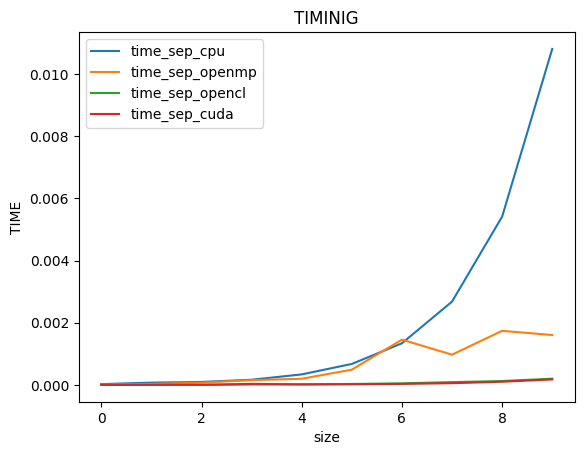

In [76]:
import matplotlib.pyplot as plt


plt.plot(time_sep_cpu, label='time_sep_cpu')
plt.plot(time_sep_openmp, label='time_sep_openmp')
plt.plot(time_sep_opencl, label='time_sep_opencl')
plt.plot(time_sep_cuda, label='time_sep_cuda')

# Adding labels and title
plt.xlabel('size')
plt.ylabel('TIME')
plt.title('TIMINIG')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [77]:
pop_measure_lock = []
pop_measure_cas = []
push_measure_lock = []
push_measure_cas = []
counter = 0

nb_threads = 16
for i in range(1, nb_threads+1):
    
    pop_measure_lock.append(sum(lines[counter:counter+i])/i)
    counter += i
    

print(pop_measure_lock)

for i in range(1, nb_threads+1):
    
    pop_measure_cas.append(sum(lines[counter:counter+i])/i)
    counter += i
    

print(pop_measure_cas)

for i in range(1, nb_threads+1):
    
    push_measure_lock.append(sum(lines[counter:counter+i])/i)
    counter += i
    

print(push_measure_lock)

for i in range(1, nb_threads+1):
    
    push_measure_cas.append(sum(lines[counter:counter+i])/i)
    counter += i
    

print(push_measure_cas)

[2.82e-05, 1014415.00000895, 676276.6667050334, 2026505.00004025, 6479948.0000575, 13504600.000217834, 55510657.14329428, 189675500.00188679, 204083942.2244658, 4051682.00002983, 19137218.18208218, 151218666.6675464, 161006102.30769473, 16770249.285727773, 259198400.00007913, 3800433.7500042627]
[1.75e-05, 16183450.0000083, 10788966.666683568, 32419200.00002135, 103685600.00003032, 216011666.6667441, 296222857.14291203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


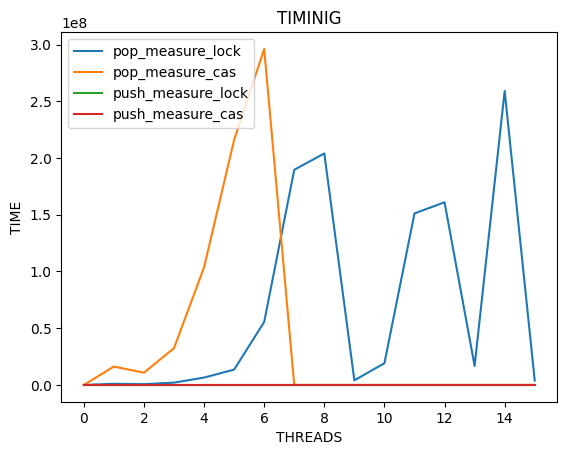

In [78]:
import matplotlib.pyplot as plt


plt.plot(pop_measure_lock, label='pop_measure_lock')
plt.plot(pop_measure_cas, label='pop_measure_cas')
plt.plot(push_measure_lock, label='push_measure_lock')
plt.plot(push_measure_cas, label='push_measure_cas')

# Adding labels and title
plt.xlabel('THREADS')
plt.ylabel('TIME')
plt.title('TIMINIG')

# Adding legend
plt.legend()

# Display the plot
plt.show()